In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#__K-Neighbors Classifier(KNN)__


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import os
from sklearn.metrics import accuracy_score
from skimage import io,transform,filters,color
import random
import matplotlib.pyplot as plt
import cv2


In [ ]:
import cv2
import numpy as np
import random

def preprocess_image_cv2(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image=cv2.equalizeHist(image)
    image=cv2.convertScaleAbs(image,1,1)
    blured_image = cv2.GaussianBlur(image, (5, 5), 1)

    resized_image = cv2.resize(blured_image, (100, 100))

    resized_image = np.fliplr(resized_image)

    rotation_angle = random.uniform(-10, 10)
    rows, cols = resized_image.shape
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), rotation_angle, 1)
    resized_image = cv2.warpAffine(resized_image, rotation_matrix, (cols, rows))
    #_,resized_image=cv2.threshold(resized_image,0,255,cv2.THRESH_OTSU)

    flattened_image = resized_image.flatten()  # reshape the image (2D to 1D)
    #plt.imshow(resized_image,cmap='gray')
    #print(resized_image.shape)
    return flattened_image
#preprocess_image_cv2('/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat.4219.jpg')

In [ ]:
#preprocessing the images
def preprocess_image_skimage(image_path):
    image=io.imread(image_path)

    image=color.rgb2gray(image)
    blured_image=filters.gaussian(image,sigma=1)
    resized_image=transform.resize(blured_image,(100,100))

    resized_image = np.fliplr(resized_image)
    rotation_angle =random.uniform(-10, 10)
    resized_image = transform.rotate(resized_image, rotation_angle)

    return resized_image.flatten()



In [ ]:
#load the images from the respective folder
trainfolder="/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/training_set"
class_names=["dogs","cats"]
data=[]
label=[]

for class_name in class_names:
    class_path=os.path.join(trainfolder,class_name)
    for image_name in os.listdir(class_path):
        if not image_name.startswith('_DS_Store'):
            image_path=os.path.join(class_path,image_name)
            pre_image=list(preprocess_image_cv2(image_path))  # using cv2
            data.append(pre_image)
            label.append(class_name)
data=np.array(data)
label=np.array(label)



In [ ]:
'''
#reshape the data into 3D to 2D
print(data.shape)
num_samples, height, width = data.shape
data_2d = data.reshape(num_samples, height * width)
'''

print(data.shape)

(8000, 10000)


In [ ]:

from sklearn.model_selection import train_test_split   # splitting the dataset into train,test and validation set

x_train,x_test_val,y_train,y_test_val=train_test_split(data,label,test_size=0.3,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_test_val,y_test_val,test_size=0.5,random_state=42)

In [ ]:

#fit the knn model model for the training set

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_prediction=knn.predict(x_val)  # evaluate the model on validation data
score=accuracy_score(knn_prediction,y_val)
print(f"Valiadtion Score={score * 100 }%")

Valiadtion Score=56.99999999999999%


In [ ]:
# k is the hyperparameter
# parameter tuning
best_accuracy=0
best_k=None
k_values=[]
acc=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    k_pred=knn.predict(x_val)
    accuracy=accuracy_score(k_pred,y_val)
    k_values.append(k)
    acc.append(accuracy)

    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_k=k
print("best_k",best_k)
print("best_accuracy",best_accuracy)


#fit the knn model model for the training set

knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train,y_train)
knn_prediction=knn.predict(x_val)  # evaluate the model on validation data using best_k
score=accuracy_score(knn_prediction,y_val)
print(f"Valiadtion Score={score * 100 }%")


best_k 18
best_accuracy 0.5833333333333334


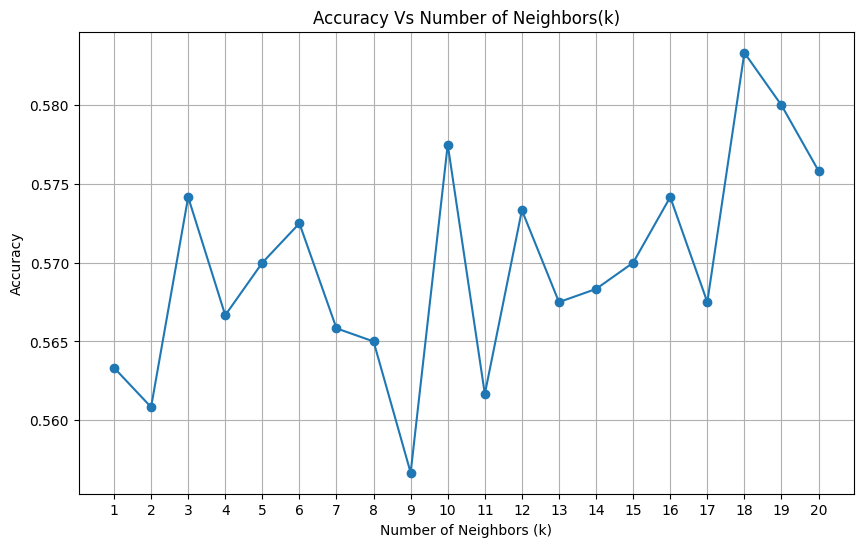

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(k_values,acc,marker='o')
plt.title("Accuracy Vs Number of Neighbors(k)")
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)


lr = LogisticRegression()
lr.fit(x_train, y_train_encoded)

print("Coefficients (Theta):", lr.coef_)
print("Intercept (Theta_0):", lr.intercept_)
if hasattr(lr, 'cost_'):
    print("Cost (Negative Log-Likelihood):", lr.cost_)

lr_predict = lr.predict(x_val)  # On validation data


lr_accuracy_score = accuracy_score(y_val_encoded, lr_predict)
lr_precision_score = precision_score(y_val_encoded, lr_predict)
lr_recall_score = recall_score(y_val_encoded, lr_predict)
lr_f1_score = f1_score(y_val_encoded, lr_predict)


print()
print(f"Accuracy Score: {lr_accuracy_score}")
print(f"Precision Score: {lr_precision_score}")
print(f"Recall Score: {lr_recall_score}")
print()
print()
print(f"Classification Report\n{classification_report(y_val_encoded,lr_predict)}")


Coefficients (Theta): [[ 3.45659948e-04  4.04458288e-04  4.33253531e-05 ... -7.39756155e-04
  -2.66825936e-04  1.00729858e-04]]
Intercept (Theta_0): [6.62202364e-07]

Accuracy Score: 0.5425
Precision Score: 0.5468227424749164
Recall Score: 0.540495867768595


Classification Report
              precision    recall  f1-score   support

           0       0.54      0.54      0.54       595
           1       0.55      0.54      0.54       605

    accuracy                           0.54      1200
   macro avg       0.54      0.54      0.54      1200
weighted avg       0.54      0.54      0.54      1200



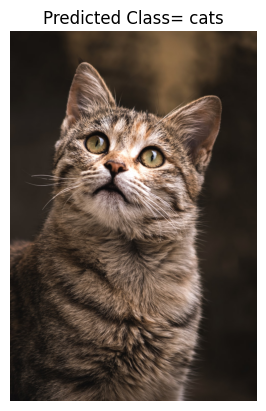

In [ ]:
new_data_path = ["/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat2.jpg"]
new_data = []

for image_path in new_data_path:
    preprocessed_image = preprocess_image_cv2(image_path)
    new_data.append(preprocessed_image)

new_data = np.array(new_data)
predicted=lr.predict(new_data)

predicted_class=le.inverse_transform(predicted)
plt.title(f"Predicted Class= {predicted_class[0]}")
plt.imshow(Image.open(new_data_path[0]))
plt.axis('off')
plt.show()

# GRADIENT DESCENT


1.   Batch Gradient Descent
2.   Stochastic Gradient Descent
3.   Mini Batch Gradient Descent




In [ ]:
# this is not (this is logistic regression)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(label)

def best_theta():
  # cost function


  def sigmoid(z):
      return 1/(1+np.exp(-z))

  def cost_estimation(x,y,theta):
      m=len(y)
      h=sigmoid(x @ theta)
      epsilon=1e-5
      cost=(-1/m)*np.sum(y*np.log(h+epsilon)+(1-y) * np.log((1-h)+ epsilon)) # formula for cost estimation
      return cost


  def mini_batch_gradient_descent(x,y,theta,learning_rate,batch_size,num_epochs):
      m=len(y)
      cost_history=[]
      for num in range(num_epochs):
          shuffle_indices=np.random.permutation(m)
          x=x[shuffle_indices]
          y=y[shuffle_indices]
          for i in range(0,m,batch_size): # find the best theta
              x_batch=x[i:i+batch_size]
              y_batch=y[i:i+batch_size]
              h=sigmoid(x_batch @ theta )
              gradient=(1/batch_size)*(x_batch.T @ (h-y_batch)) # gardient of the logistic regression
              theta=theta-(learning_rate * gradient)
          cost=cost_estimation(x,y,theta)
          cost_history.append(cost)
      return theta,cost_history

  num_features=data.shape[1]
  '''
  bias_term=False
  if bias_term:
      num_features=data.shape[1]+1
  else:
      num_features=data.shape[1]
  '''

  initial_theta=np.random.rand(num_features)
  learning_rate=0.01
  num_epoch=100
  batch_size=32
  best_theta,cost_history=mini_batch_gradient_descent(data,label,initial_theta,learning_rate,batch_size,num_epoch)
  print("best_theta:",best_theta)
  print()
  print("optimised cost=",cost_history[-1])

  return best_theta,num_epoch,cost_history




best_theta: [ 18.24535789  -3.28656428 -16.44890694 ...  24.62793284  15.87777719
   9.02988834]

optimised cost= 5.615309288305181


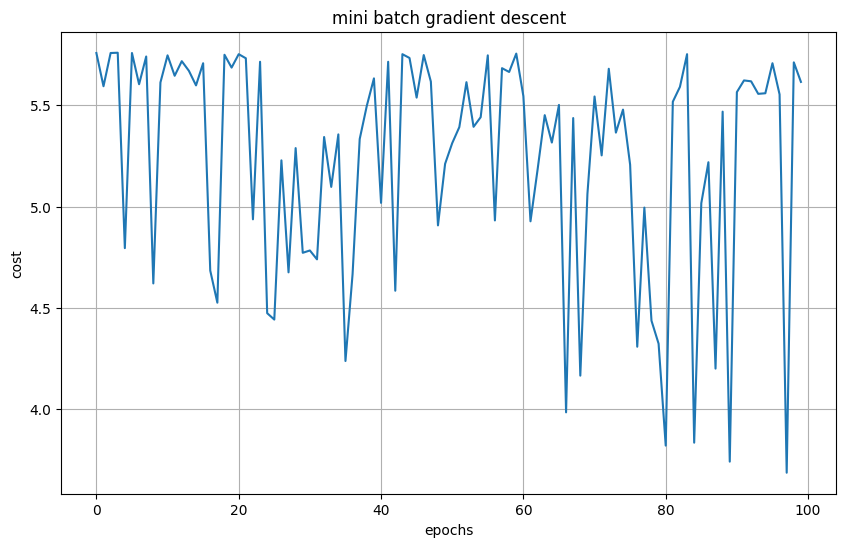

In [ ]:
plt.figure(figsize=(10,6))
_,num_epoch,cost_history=best_theta()
plt.plot(range(num_epoch),cost_history)
plt.title("mini batch gradient descent")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.grid(True)


EARLY STOPPING METHOD

In [ ]:
'''
# cost function
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
label=le.fit_transform(label)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def cost_estimation(x,y,theta):
    m=len(y)
    h=sigmoid(x @ theta)
    epsilon=1e-5
    cost=(-1/m)*np.sum(y*np.log(h+epsilon)+(1-y) * np.log((1-h)+ epsilon))
    return cost

bias_term=False
if bias_term:
    num_features=data.shape[1]+1
else:
    num_features=data.shape[1]

def mini_batch_gradient_descent(x,y,theta,learning_rate,batch_size,num_epochs):
    m=len(y)
    cost_history=[]
    best_cost=float("inf")
    count=0
    for num in range(num_epochs):
        shuffle_indices=np.random.permutation(m)
        x=x[shuffle_indices]
        y=y[shuffle_indices]
        for i in range(0,m,batch_size): # find the best theta
            x_batch=x[i:i+batch_size]
            y_batch=y[i:i+batch_size]
            h=sigmoid(x_batch @ theta )
            gradient=(1/batch_size)*(x_batch.T @ (h-y_batch))
            theta=theta-(learning_rate * gradient)
        cost=cost_estimation(x,y,theta)
        cost_history.append(cost)
        if cost<best_cost:
            best_cost=cost
            epoch=num
            count=0
        else:
            count+=1
            if count>=80:
                print("Early stopping")
                break
    return theta,cost_history,best_cost,epoch




initial_theta=np.random.rand(num_features)
learning_rate=0.01
num_epoch=100
batch_size=32
best_theta,cost_history,best_cost,epoch=mini_batch_gradient_descent(data,label,initial_theta,learning_rate,batch_size,num_epoch)
print("best_theta:",best_theta)
print()
print("optimised cost=",best_cost)
print()
print("epoch=",epoch)


plt.figure(figsize=(10,6))
plt.plot(range(num_epoch),cost_history)
plt.title("mini batch gradient descent")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.grid(True)
'''


'\n# cost function\nfrom sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\nlabel=le.fit_transform(label)\n\ndef sigmoid(z):\n    return 1/(1+np.exp(-z))\n\ndef cost_estimation(x,y,theta):\n    m=len(y)\n    h=sigmoid(x @ theta)\n    epsilon=1e-5\n    cost=(-1/m)*np.sum(y*np.log(h+epsilon)+(1-y) * np.log((1-h)+ epsilon))\n    return cost\n\nbias_term=False\nif bias_term:\n    num_features=data.shape[1]+1\nelse:\n    num_features=data.shape[1]\n\ndef mini_batch_gradient_descent(x,y,theta,learning_rate,batch_size,num_epochs):\n    m=len(y)\n    cost_history=[]\n    best_cost=float("inf")\n    count=0\n    for num in range(num_epochs):\n        shuffle_indices=np.random.permutation(m)\n        x=x[shuffle_indices]\n        y=y[shuffle_indices]\n        for i in range(0,m,batch_size): # find the best theta\n            x_batch=x[i:i+batch_size]\n            y_batch=y[i:i+batch_size]\n            h=sigmoid(x_batch @ theta )\n            gradient=(1/batch_size)*(x_batch.T @ (h-y_b

best_theta: [ 15.26436645  -3.42406595 -21.7071083  ...  16.85717113  11.37674097
   8.76491564]

optimised cost= 5.678745418121903
[ 15.26436645  -3.42406595 -21.7071083  ...  16.85717113  11.37674097
   8.76491564]


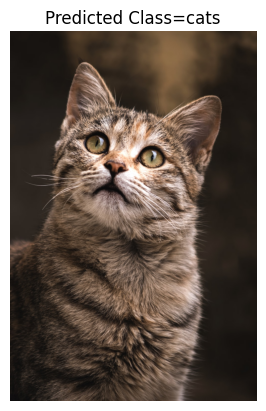

In [ ]:
new_data_path = ["/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat2.jpg"]
new_data = []

for image_path in new_data_path:
    preprocessed_image = preprocess_image_cv2(image_path)
    new_data.append(preprocessed_image)

new_data = np.array(new_data)

best_theta_result, num_epoch,cost= best_theta()

print(best_theta_result)
logits = new_data @ best_theta_result  # Applying learned weights to new data

probabilities = 1 / (1 + np.exp(-logits))

print(probabilities)
predicted_class = np.argmax(probabilities)

predicted_class_label = le.inverse_transform([predicted_class])[0]

#print(f"Predicted class: {predicted_class_label}")

import cv2
image=cv2.imread(new_data_path[0])
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.title(f"Predicted Class={predicted_class_label}")
plt.axis('off')
plt.imshow(image)


Coefficients=[[ 3.01405357e-04  2.12932503e-04 -2.45849558e-06 ...  2.33787724e-04
   2.39275922e-04  1.83306448e-04]]
Intercept=[4.86249342e-07]


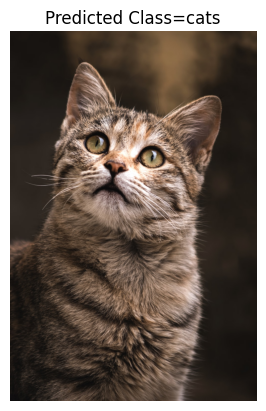

In [ ]:
print(f"Coefficients={lr.coef_}")
print(f"Intercept={lr.intercept_}")
prediction=lr.predict(new_data)  # Using Logistic Regression
predicted_class_label = le.inverse_transform([prediction])[0]

#print(f"Predicted class: {predicted_class_label}")

import cv2
image=cv2.imread(new_data_path[0])
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.title(f"Predicted Class={predicted_class_label}")
plt.axis('off')
plt.imshow(image)


# SUPPORT VECTOR MACHINE(SVM)


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01,0.1],
    'gamma': [0.001, 0.01,0.1]
}

svm = SVC(kernel='rbf')
model = GridSearchCV(svm, param_grid, cv=5)
model.fit(x_train, y_train)

import matplotlib.pyplot as plt
new_data_path=["/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat2.jpg"]
new_data=[]
for image_path in new_data_path:
    features_new_data=preprocess_image_cv2(image_path)
    new_data.append(features_new_data)
new_data=np.array(new_data)

model_predict=model.predict(new_data)

predicted_class=class_names[model_predict[0]]
#print(predicted_class)

from PIL import Image
new_image=Image.open(new_data_path[0])
plt.title(f"predicted class:{predicted_class}")
plt.imshow(new_image)
plt.axis("off")
plt.show()

#__Histogram of an image__

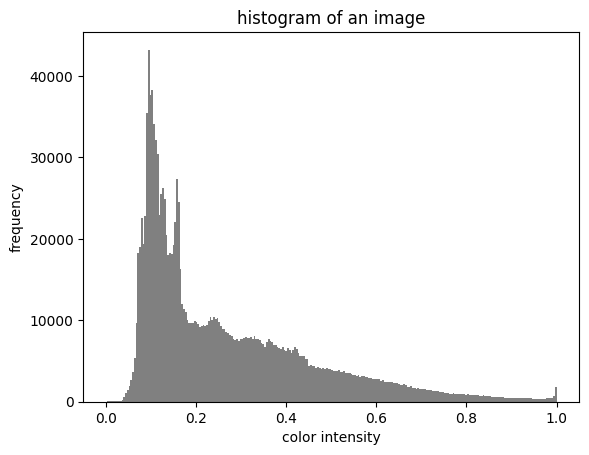

In [ ]:
import matplotlib.pyplot as plt
from skimage import io,color
image_paths=["/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat2.jpg"]
for image_path in image_paths:
    image=io.imread(image_path)
    gray_image=color.rgb2gray(image)

    plt.hist(gray_image.ravel(),bins=256,range=(0.0,1.0),color="gray")
    plt.title("histogram of an image")
    plt.xlabel("color intensity")
    plt.ylabel("frequency")
    plt.show()




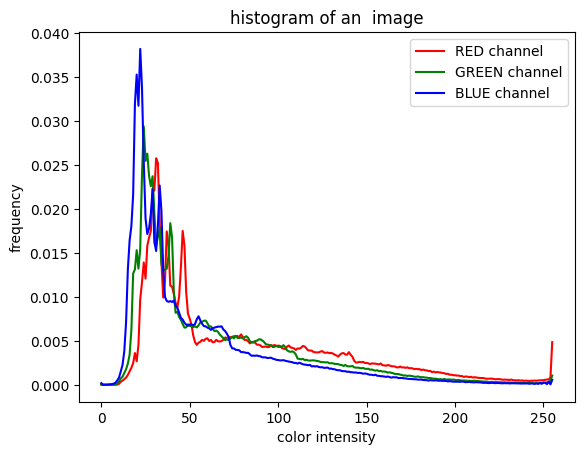

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image_paths=["/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat2.jpg"]
for image_path in image_paths:
    image=io.imread(image_path)
    red_channel,bin_edge=np.histogram(image[:,:,0],bins=256,range=(0,256))
    green_channel,_=np.histogram(image[:,:,1],bins=256,range=(0,256))
    blue_channel,_=np.histogram(image[:,:,2],bins=256,range=(0,256))

    red_channel=red_channel/red_channel.sum()
    green_channel=green_channel/green_channel.sum()
    blue_channel=blue_channel/blue_channel.sum()

    plt.plot(red_channel,color='red',label='RED channel',alpha=1)
    plt.plot(green_channel,color='green',label='GREEN channel',alpha=1)
    plt.plot(blue_channel,color='blue',label='BLUE channel',alpha=1)


    plt.title("histogram of an  image")
    plt.xlabel("color intensity")
    plt.ylabel("frequency")
    plt.legend()
    plt.show()


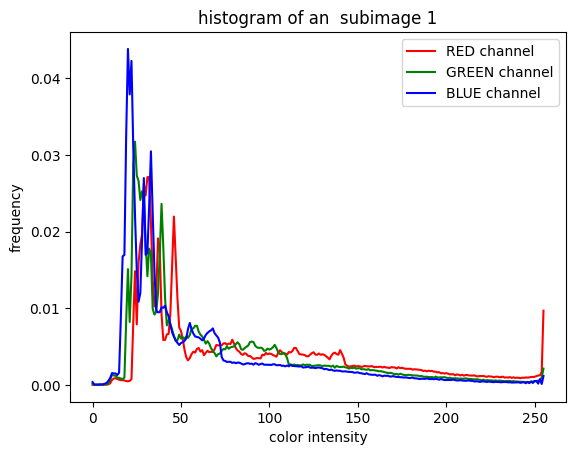

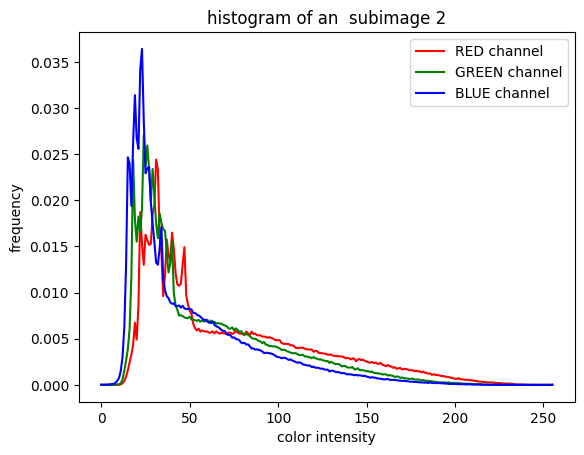

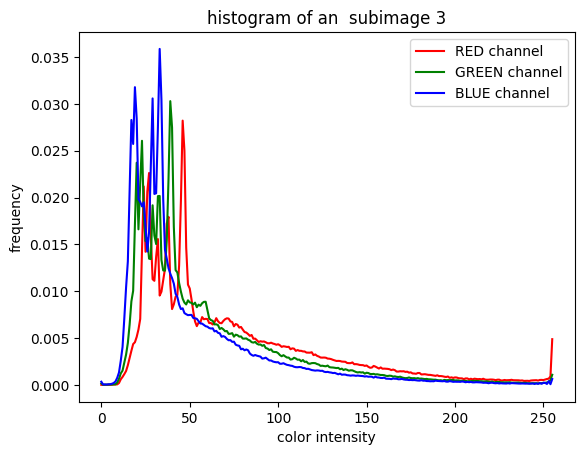

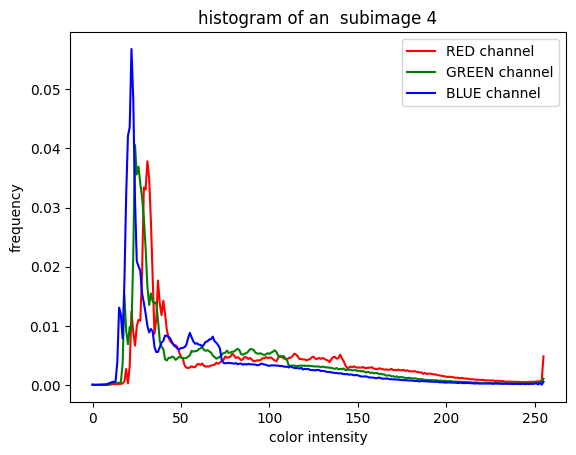

In [ ]:
rows,colmn=image.shape[:2] # histogram of an sub images
mid=rows//2
top_image=image[:mid,:]
bottom_image=image[mid:,:]
middle=colmn//2
left_image=image[:,:middle]
right_image=image[:,middle:]

subimages=[top_image,bottom_image,left_image,right_image]

for i ,subimage in enumerate (subimages):

    red_channel,bin_edge=np.histogram(subimage[:,:,0],bins=256,range=(0,256))
    green_channel,_=np.histogram(subimage[:,:,1],bins=256,range=(0,256))
    blue_channel,_=np.histogram(subimage[:,:,2],bins=256,range=(0,256))

    red_channel=red_channel/red_channel.sum()
    green_channel=green_channel/green_channel.sum()
    blue_channel=blue_channel/blue_channel.sum()

    plt.plot(red_channel,color='red',label='RED channel',alpha=1)
    plt.plot(green_channel,color='green',label='GREEN channel',alpha=1)
    plt.plot(blue_channel,color='blue',label='BLUE channel',alpha=1)


    plt.title(f"histogram of an  subimage {i+1}")
    plt.xlabel("color intensity")
    plt.ylabel("frequency")
    plt.legend()
    plt.show()

#__HOG Feature Extraction__

gray Image ->gradient ->gradient direction ->hog_feature -> kernel -> linear classifier

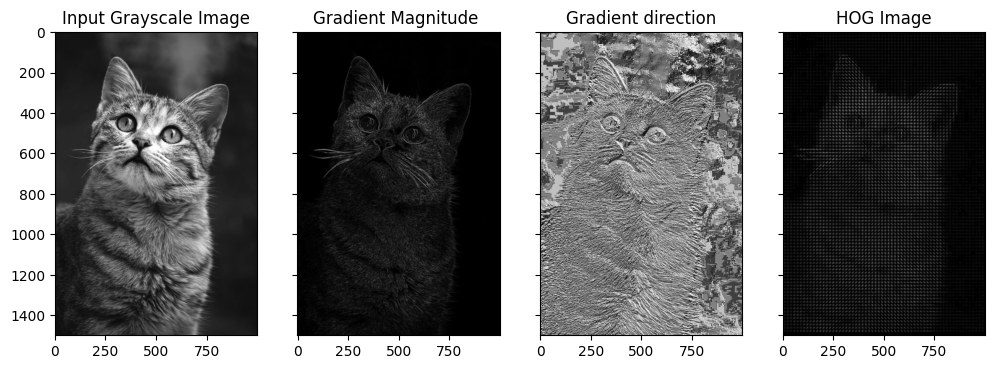

In [ ]:
image_path = "/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat2.jpg"

from skimage.filters import sobel
from skimage import color, io, exposure
import numpy as np
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt

image = io.imread(image_path)

gray_image = color.rgb2gray(image)

#gray_img = cv2.resize(gray_image, (128, 64))
gray_img=gray_image.copy()

gradient_magnitude=sobel(gray_image)
gradient_direction=np.arctan2(sobel(gray_image,axis=0),sobel(gray_image,axis=1))
fd, hog_image = hog(gradient_magnitude, pixels_per_cell=(16,16), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
# we can vary the pixels_per_cell

#fd, hog_image = hog(gray_img, orientations=9, pixels_per_cell=(8,8), cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)
#print(fd)  # feature vector
fig, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, figsize=(12, 6), sharex=True, sharey=True)

ax1.imshow(gray_img, cmap=plt.cm.gray)
ax1.set_title('Input Grayscale Image')


hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
gamma_corrected = exposure.adjust_gamma(hog_image_rescaled, gamma=0.4)


ax2.imshow(gradient_magnitude,cmap=plt.cm.gray)
ax2.set_title('Gradient Magnitude ')

ax3.imshow(gradient_direction,cmap=plt.cm.gray)
ax3.set_title('Gradient direction')

ax4.imshow(gamma_corrected, cmap=plt.cm.gray)
ax4.set_title('HOG Image')


plt.show()


In [ ]:
import os
from skimage import io,color
from skimage.filters import sobel
from skimage.transform import resize
import numpy as np
from skimage.feature import hog
image_folder="/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/training_set"

def preprocess_hog(image_path):
    image=io.imread(image_path)
    gray_image=color.rgb2gray(image)
    gray_image=resize(gray_image,(100,100))
    gradient_magnitude=sobel(gray_image)
    gradient_direction=np.arctan2(sobel(gray_image,axis=0),sobel(gray_image,axis=1))
    hog_feature=hog(gradient_magnitude,block_norm='L2-Hys',pixels_per_cell=(8,8),cells_per_block=(2,2))
    return hog_feature.flatten()

features=[]
label=[]
class_names=['cats','dogs']
for class_name in class_names:
    class_path=os.path.join(image_folder,class_name)
    for image_name in os.listdir(class_path):
        if not image_name.startswith('_DS_Store'):
            image_path=os.path.join(class_path,image_name)
            feature=preprocess_hog(image_path)
            features.append(feature)
            label.append(class_name)



In [ ]:
features_data=np.array(features)
label=np.array(label)

In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
le=LabelEncoder()
label=le.fit_transform(label)

from sklearn.model_selection import train_test_split   # splitting the dataset into train,test and validation set

x_train,x_test_val,y_train,y_test_val=train_test_split(features_data,label,test_size=0.3,random_state=42)
x_test,x_val,y_test,y_val=train_test_split(x_test_val,y_test_val,test_size=0.5,random_state=42)

#__KNN Image Classification using HOG feature extraction method__

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


best_accuracy=0
best_k=None
best_prediction=None
k_values=[]
accuracy_values=[]
for k in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    k_pred=knn.predict(x_val)
    accuracy=accuracy_score(k_pred,y_val)
    k_values.append(k)
    accuracy_values.append(accuracy)

    print(f"K:{k},Accuracy:{accuracy}")

    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_k=k
        best_prediction=k_pred
print()
print("best_k",best_k)
print("best_accuracy",best_accuracy)


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(features_data,label)


K:1,Accuracy:0.5408333333333334
K:2,Accuracy:0.5583333333333333
K:3,Accuracy:0.5358333333333334
K:4,Accuracy:0.5658333333333333
K:5,Accuracy:0.5316666666666666
K:6,Accuracy:0.5458333333333333
K:7,Accuracy:0.5275
K:8,Accuracy:0.5416666666666666
K:9,Accuracy:0.5258333333333334
K:10,Accuracy:0.5366666666666666
K:11,Accuracy:0.5183333333333333
K:12,Accuracy:0.5258333333333334
K:13,Accuracy:0.52
K:14,Accuracy:0.5266666666666666
K:15,Accuracy:0.52
K:16,Accuracy:0.5225
K:17,Accuracy:0.5191666666666667
K:18,Accuracy:0.5191666666666667
K:19,Accuracy:0.5158333333333334
K:20,Accuracy:0.5183333333333333
K:21,Accuracy:0.5125
K:22,Accuracy:0.5175
K:23,Accuracy:0.5141666666666667
K:24,Accuracy:0.52
K:25,Accuracy:0.5141666666666667

best_k 4
best_accuracy 0.5658333333333333


KNeighborsClassifier(n_neighbors=4)

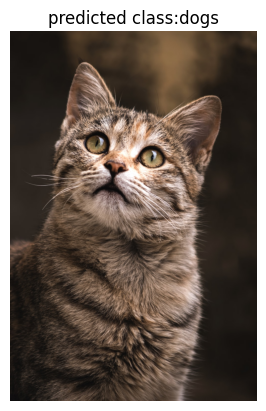

In [ ]:
import matplotlib.pyplot as plt
new_data_path=["/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/cat2.jpg"]
new_data=[]
for image_path in new_data_path:
    features_new_data=preprocess_hog(image_path)
    new_data.append(features_new_data)
new_data=np.array(new_data)

knn_predict=knn.predict(new_data)
#print(svm_predict)
predicted_class=class_names[knn_predict[0]]
#print(predicted_class)

from PIL import Image
new_image=Image.open(new_data_path[0])
plt.title(f"predicted class:{predicted_class}")
plt.imshow(new_image)
plt.axis("off")
plt.show()

In [ ]:
# mis classified

# __SIFT(Scale-Invariant-Feature_Transform)method__


[Reference](https://medium.com/@deepanshut041/introduction-to-sift-scale-invariant-feature-transform-65d7f3a72d40)

True

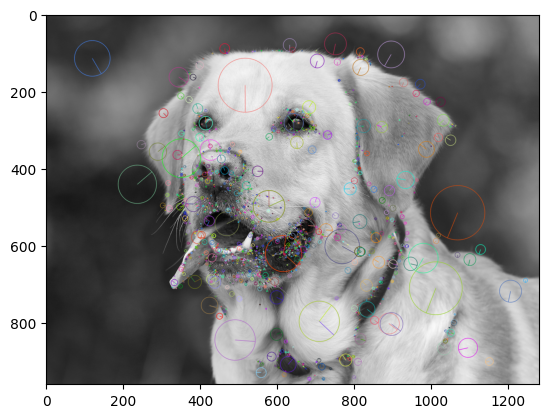

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread("/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/dog2.jpg")
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
img=cv2.drawKeypoints(gray,kp,img)
img=cv2.drawKeypoints(gray,kp,img,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)  # additional
plt.imshow(img)
cv2.imwrite('sift_keypoints.jpg',img)

#__SURF( Speeded Up Robust Features ) in opencv__


[Reference](https://medium.com/@deepanshut041/introduction-to-surf-speeded-up-robust-features-c7396d6e7c4e)

# "A GPU or high system requirements are needed to run the following cells."

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
grid_param={'C':[0.001,0.01,0.1,1],
            'gamma':[0.001,0.01,0.1,1]}
svm_classifier=SVC(kernel='rbf')
gridsearch=GridSearchCV(svm_classifier,grid_param,cv=5)
gridsearch.fit(x_train,y_train)
results=gridsearch.cv_results_

for mean_accuracy,param in zip(results["mean_test_score"],results["params"]):
  print(f"mean_accuracy:{mean_accuracy},Parameters:{param}")


print("best parameter:",gridsearch.best_params_)
print("best cross validation score=",gridsearch.best_score_)



'''
from sklearn.model_selection import RandomizedSearchCV
param={'C':[0.001,0.01,0.1,1,10],
            'gamma':[0.001,0.01,0.1,1,10]}
svm_classifier=SVC(kernel='rbf')
randomsearch=RandomizedSearchCV(svm_classifier,param,cv=5)
randomsearch.fit(x_train,y_train)

results=randomsearch.cv_results_
for mean_accuracy,param in zip(results["mean_test_score"],results["params"]):
  print(f"mean_accuracy:{mean_accuracy},Parameters:{param}")
  print()

print("best parameter:",randomsearch.best_params_)
print("best cross validation score=",randomsearch.best_score_)
'''

In [ ]:
from sklearn.metrics import accuracy_score
svm_classifier=SVC(kernel='rbf',C=1,gamma=0.1)
svm_classifier.fit(x_train,y_train)
svm_predict=svm_classifier.predict(x_val)
print("accuracy_score=",accuracy_score(svm_predict,y_val))

In [ ]:

import matplotlib.pyplot as plt

m = 0
n = 0
misclassified_points = []
correct_classified_points = []

for i in range(len(y_val)):
    if svm_predict[i] == y_val[i]:
        m += 1
        correct_classified_points.append((i, m))
    else:
        n += 1
        misclassified_points.append((i, n))

print("Misclassified amount:", n)
print("Correct classified amount:", m)


misclassified_x, misclassified_y = zip(*misclassified_points)
correct_classified_x, correct_classified_y = zip(*correct_classified_points)
#print(misclassified_x)

plt.figure(figsize=(10, 6))
plt.scatter(misclassified_x, misclassified_y, color='red', marker='x', label='Misclassified')
plt.scatter(correct_classified_x, correct_classified_y, color='green', marker='o', label='Correct Classified')
plt.xlabel("Sample Index")
plt.ylabel("Cumulative Count")
plt.title("Misclassified and Correct Classified Samples")
plt.legend()
plt.show()


In [ ]:
new_data_path=["/content/drive/MyDrive/opencv_courcera/New folder/WORK/machine learning image classification/test_unseen_data/dog2.jpg"]
new_data=[]
for image_path in new_data_path:
    features_new_data=preprocess_hog(image_path)
    new_data.append(features_new_data)
new_data=np.array(new_data)

svm_predict=svm_classifier_w.predict(new_data)
#print(svm_predict)
predicted_class=class_names[svm_predict[0]]
#print(predicted_class)

from PIL import Image
new_image=Image.open(new_data_path[0])
plt.title(f"predicted class:{predicted_class}")
plt.imshow(new_image)
plt.axis("off")
plt.show()

#__VOTING CLASSIFIER__

In [ ]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

rf=RandomForestClassifier()
knn=KNeighborsClassifier(n_neighbors=2)
svm=SVC(kernel='rbf')
lr=LogisticRegression()
vlf=VotingClassifier(estimators=[('rf',rf),('knn',knn),('svm',svm),('lr',lr)],voting='hard')
vlf.fit(feature_train,l_train)
for clf in (rf,knn,svm,lr,vlf):
    clf.fit(feature_train,l_train)
    clf_predict=clf.predict(feature_test)
    print(clf.__class__.__name__, accuracy_score(clf_predict,l_test))




# __Various Feature Descriptors__

1. Histogram of Oriented Gradients (HOG):
Gradient Calculation: HOG begins by computing gradients in an image. Gradients capture the intensity changes in different directions across the image. Typically, gradient magnitude and direction are computed using operators like Sobel or Prewitt.

* Cell Division: The image is divided into small regions called cells. Within each cell, histograms of gradient orientations are constructed. These histograms count the occurrences of gradient orientations, considering both the magnitude and direction of gradients within that cell.

* Block Normalization: The cells are grouped into larger blocks, and normalization of histograms within each block occurs. Normalization helps in making the descriptor more robust against variations in illumination and contrast.

* Descriptor Formation: Finally, the normalized histograms from all blocks are concatenated to form the HOG descriptor, which represents the image's structure in terms of localized gradient orientations.

2. Global Orthogonal Group (GOG):
* GOG descriptors aim to represent the global structure and orientation patterns within an image. They also work with orientation information but focus on capturing global relationships within the image.

While specific implementation details might differ, generally, GOG descriptors involve:

* Orientation Information: GOG analyzes the orientation patterns globally in the image, capturing relationships between orientations across the entire image.

* Feature Construction: It constructs descriptors or representations that emphasize these global orientation relationships, which can be used to describe the overall orientation characteristics of the image.

3. Local Binary Patterns (LBP):
LBP describes texture patterns by comparing each pixel with its neighboring pixels. It's used in texture classification, face recognition, and more.

4. Scale-Invariant Feature Transform (SIFT):
SIFT detects and describes local features in images. It's robust to scaling, rotation, and changes in illumination, often used in object recognition and matching.

5. Speeded Up Robust Features (SURF):
Similar to SIFT but faster, SURF identifies interest points in images and describes them based on local gradient information.

6. Oriented FAST and Rotated BRIEF (ORB):
ORB combines FAST keypoint detection and BRIEF descriptor methods. It's used for real-time object recognition and tracking.

7. DAISY (Descriptor for Angular and Spatial Yarn):
DAISY captures both local and global structures in images, particularly useful for texture description and shape detection.

8. Color Histograms:
Histogram-based descriptors that represent the distribution of colors in an image. They're simple but effective in various image retrieval and classification tasks.

9. Local Phase Quantization (LPQ):
LPQ extracts texture features by quantizing the phase information of local image structures.

10. Gabor Filters:
Gabor filters analyze images in terms of frequencies and orientations, often used in texture analysis and segmentation.

11. Convolutional Neural Network (CNN) Features:
CNNs learn features automatically through convolutional layers. The features extracted from different layers are used as descriptors, especially in tasks like image classification and object detection.